# PathGrow: Career Development Platform

In this project will be make a model Career Recommandation for dataset:
 - https://www.kaggle.com/datasets/shanimmahir/studies-career-recommendation-dataset
 - https://www.kaggle.com/datasets/shailx/course-recommendation-system-dataset

## Import Library and Dataset

In [3]:
import pandas as pd
import numpy as np

In [4]:
# df = pd.read_csv('/content/drive/MyDrive/PathGrow: Career Development Platform/student-scores-6k.csv')
url = 'https://docs.google.com/spreadsheets/d/1uRSw8KWp6zkMjt82Ixnsn3yts-6IWz1uRS5BNHG-H0I/export?format=csv'
df = pd.read_csv(url)
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Social Network Studies,84,77,65,65,80,74,76


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          6000 non-null   int64 
 1   first_name                  6000 non-null   object
 2   last_name                   6000 non-null   object
 3   email                       6000 non-null   object
 4   gender                      6000 non-null   object
 5   part_time_job               6000 non-null   bool  
 6   absence_days                6000 non-null   int64 
 7   extracurricular_activities  6000 non-null   bool  
 8   weekly_self_study_hours     6000 non-null   int64 
 9   career_aspiration           6000 non-null   object
 10  math_score                  6000 non-null   int64 
 11  history_score               6000 non-null   int64 
 12  physics_score               6000 non-null   int64 
 13  chemistry_score             6000 non-null   int6

In [ ]:
df.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score'],
      dtype='object')

In [ ]:
df[['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']].describe()

,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,83.452000,80.332000,81.336500,79.995000,79.581500,81.277500,80.888000
std,13.222702,12.733923,12.537363,12.775765,13.719903,12.025082,11.635765
min,40.000000,50.000000,50.000000,50.000000,30.000000,50.000000,60.000000
25%,77.000000,69.750000,71.000000,69.000000,69.000000,72.000000,71.000000
50%,87.000000,82.000000,83.000000,81.000000,81.000000,83.000000,81.000000
75%,93.000000,91.000000,92.000000,91.000000,91.000000,91.000000,91.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000


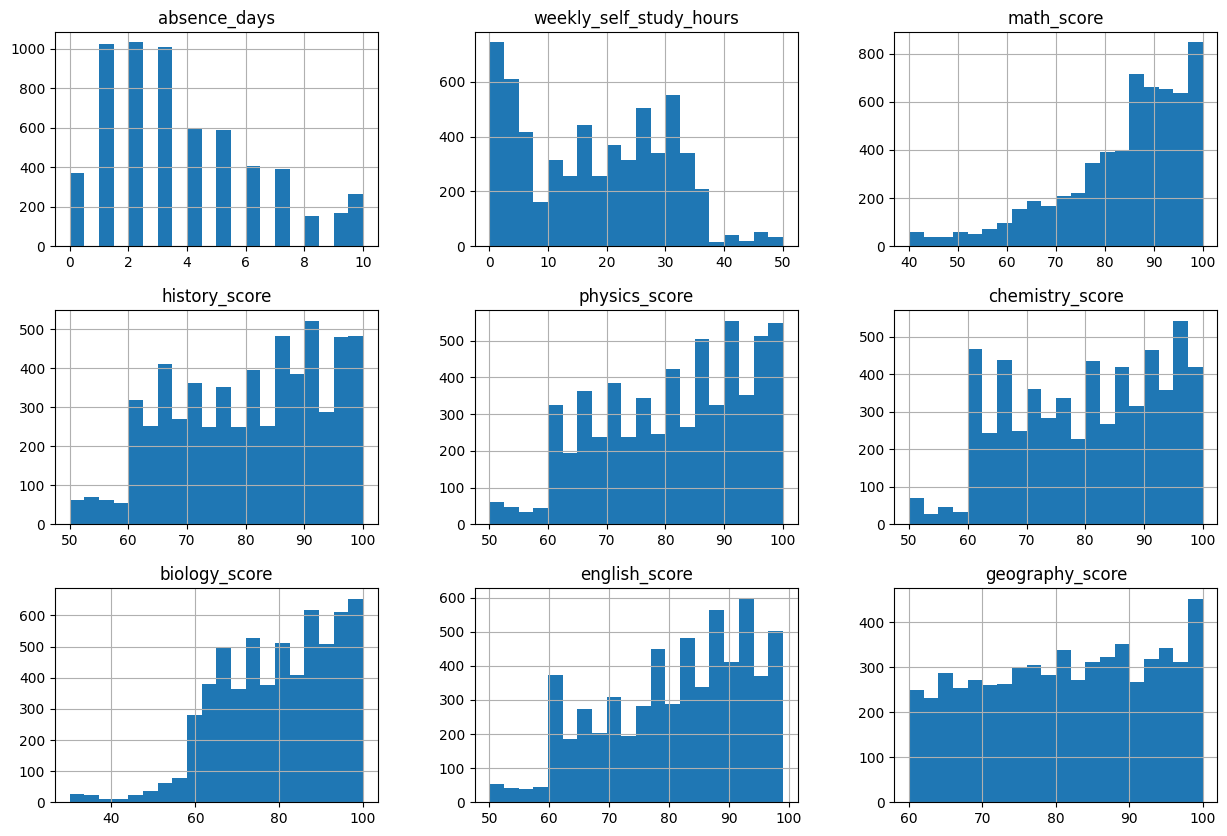

In [ ]:
import matplotlib.pyplot as plt

numeric_columns = [
    "absence_days",
    "weekly_self_study_hours",
    "math_score",
    "history_score",
    "physics_score",
    "chemistry_score",
    "biology_score",
    "english_score",
    "geography_score"
]

df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.show()


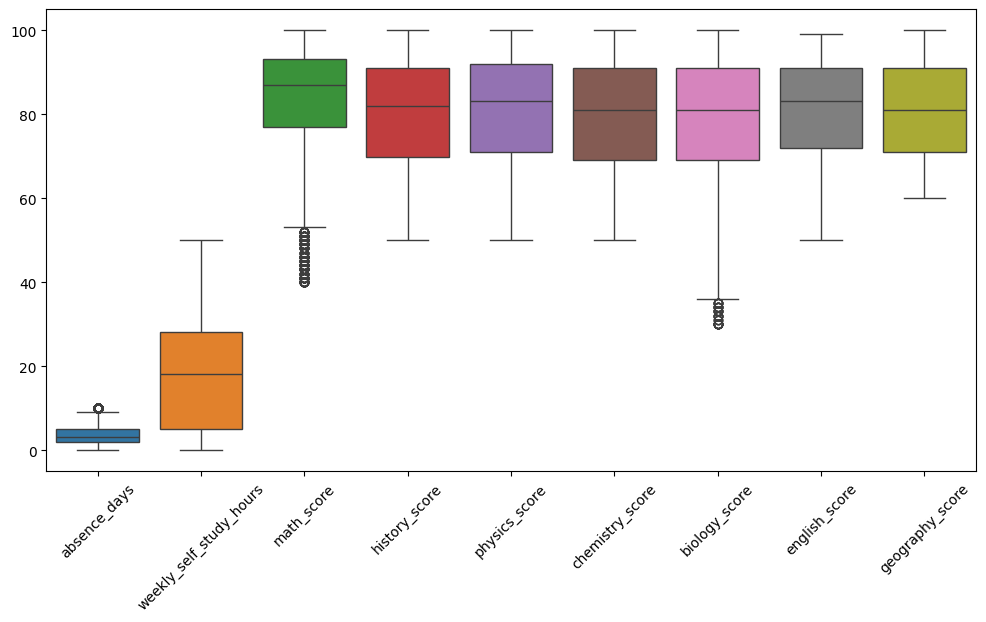

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.show()

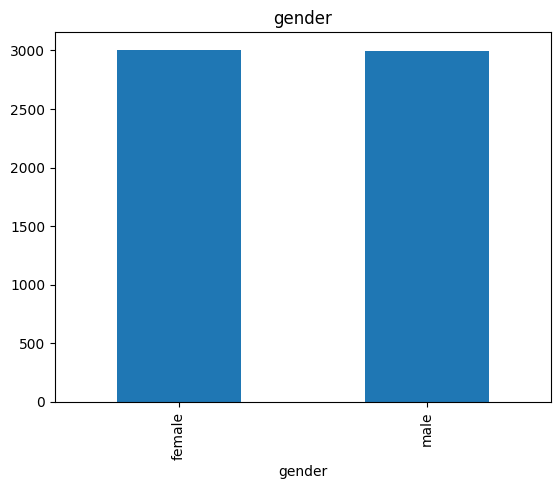

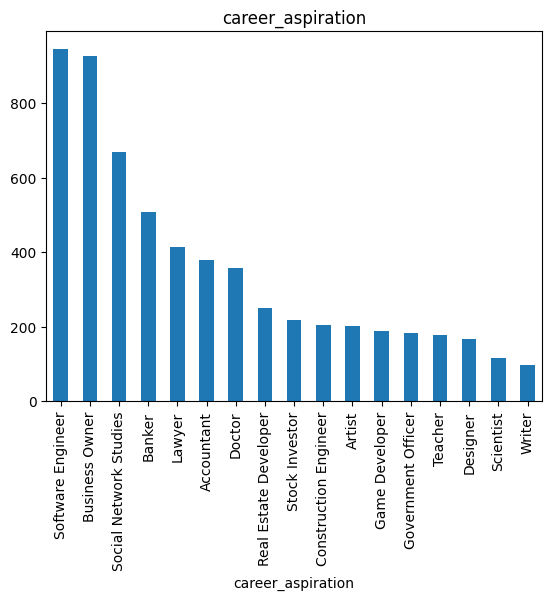

In [ ]:
categorical_columns = ["gender", "career_aspiration"]

for column in categorical_columns:
    df[column].value_counts().plot(kind='bar', title=column)
    plt.show()


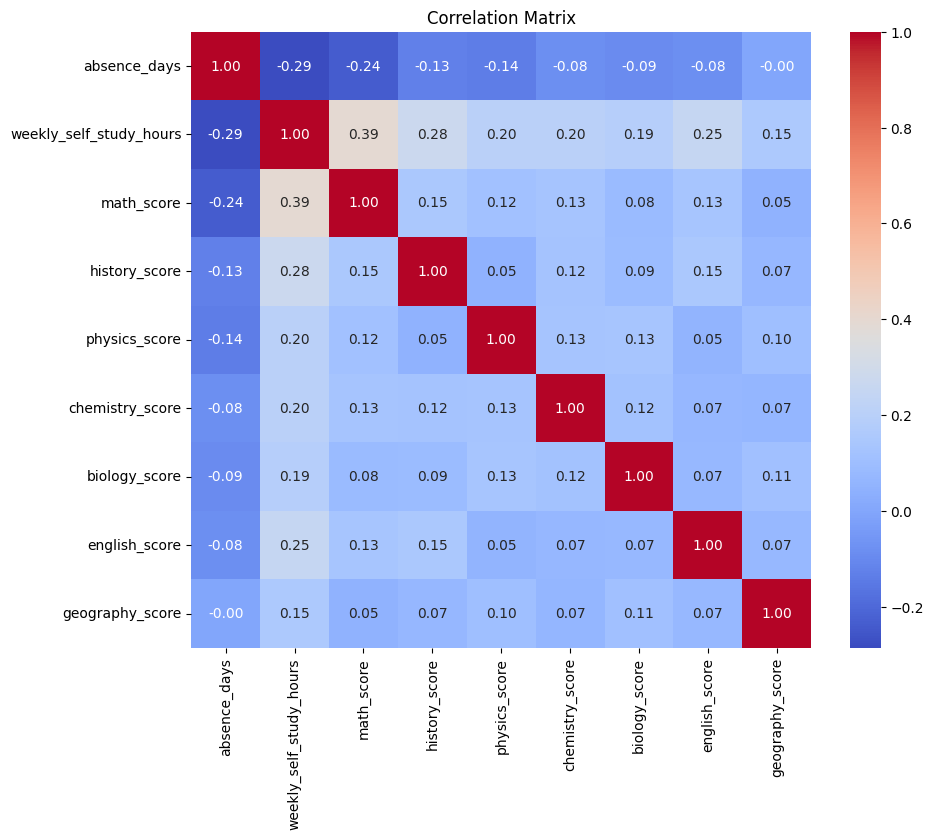

In [ ]:
correlation = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

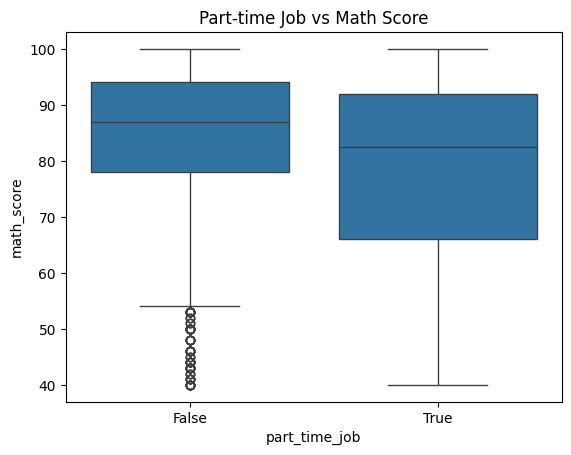

In [ ]:
sns.boxplot(data=df, x='part_time_job', y='math_score')
plt.title("Part-time Job vs Math Score")
plt.show()

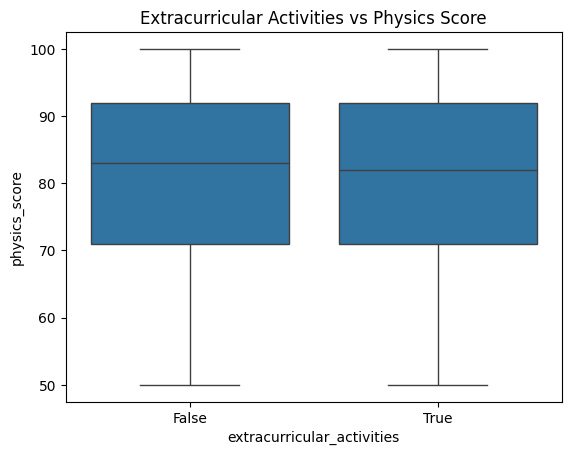

In [ ]:
sns.boxplot(data=df, x='extracurricular_activities', y='physics_score')
plt.title("Extracurricular Activities vs Physics Score")
plt.show()

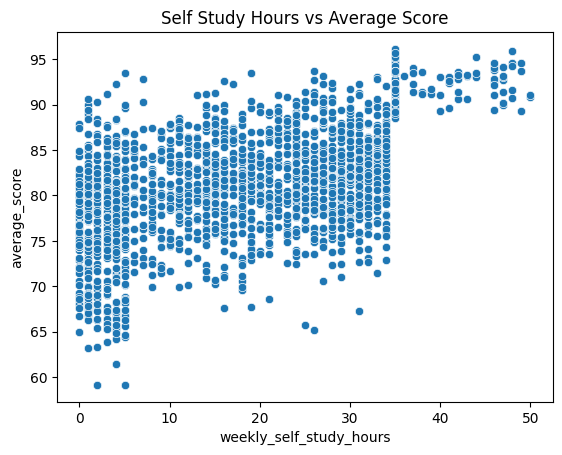

In [ ]:
df['average_score'] = df[
    ['math_score', 'history_score', 'physics_score', 'chemistry_score',
     'biology_score', 'english_score', 'geography_score']
].mean(axis=1)

sns.scatterplot(data=df, x='weekly_self_study_hours', y='average_score')
plt.title("Self Study Hours vs Average Score")
plt.show()

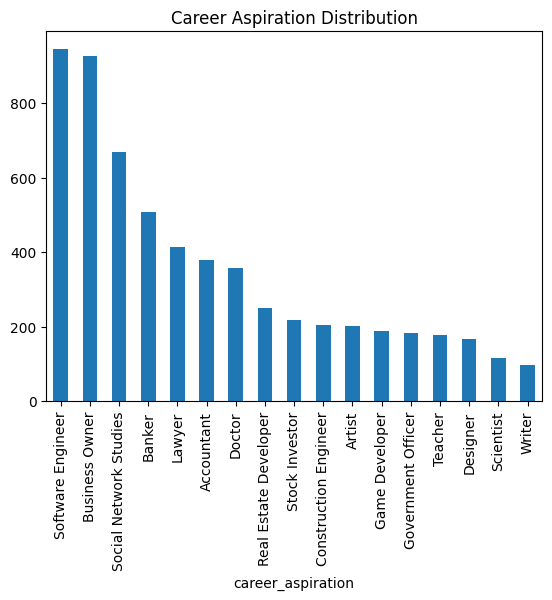

In [ ]:
df['career_aspiration'].value_counts().plot(kind='bar')
plt.title("Career Aspiration Distribution")
plt.show()

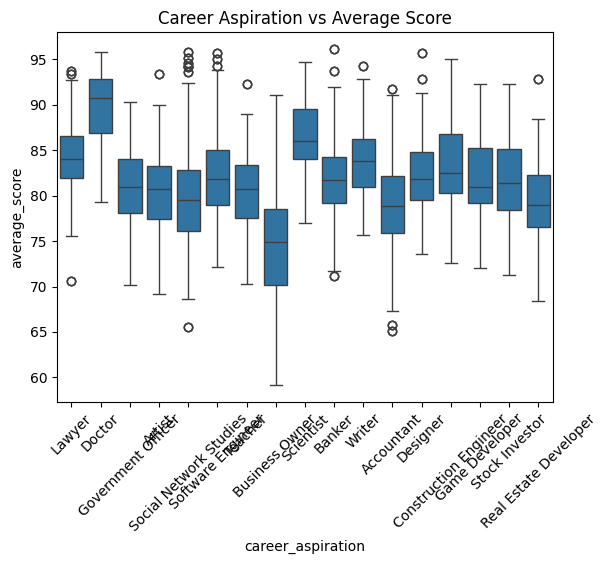

In [ ]:
sns.boxplot(data=df, x='career_aspiration', y='average_score')
plt.title("Career Aspiration vs Average Score")
plt.xticks(rotation=45)
plt.show()

## Preprocessing Data

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
# Memeriksa nilai yang hilang
print(df.isnull().sum())

# Jika ada nilai kosong pada kolom numerik
# df.fillna(df.median(), inplace=True)

# Jika ada nilai kosong pada kolom kategorikal
# df.fillna(df.mode().iloc[0], inplace=True)


id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64


In [7]:
df['average_score'] = df[
    ['math_score', 'history_score', 'physics_score',
     'chemistry_score', 'biology_score', 'english_score', 'geography_score']
].mean(axis=1)


In [8]:
label_encoders = {}

# Encoding gender
label_encoders['gender'] = LabelEncoder()
df['gender'] = label_encoders['gender'].fit_transform(df['gender'])

# Encoding career_aspiration
label_encoders['career_aspiration'] = LabelEncoder()
df['career_aspiration'] = label_encoders['career_aspiration'].fit_transform(df['career_aspiration'])


In [9]:
scaler = StandardScaler()

# Fitur numerik
numerical_columns = [
    'absence_days', 'weekly_self_study_hours',
    'math_score', 'history_score', 'physics_score',
    'chemistry_score', 'biology_score', 'english_score',
    'geography_score', 'average_score'
]

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [10]:
X = df.drop(columns=['career_aspiration', 'id', 'first_name', 'last_name', 'email'])
y = df['career_aspiration']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)


Training Data: (4800, 13)
Testing Data: (1200, 13)


## Modelling

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input shape harus jelas
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(y_train.unique()), activation='softmax')
])


# Kompilasi model
nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = nn_model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
)
# Evaluasi pada data uji
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2196 - loss: 2.5280 - val_accuracy: 0.4167 - val_loss: 1.8403
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4194 - loss: 1.7864 - val_accuracy: 0.4708 - val_loss: 1.5979
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4769 - loss: 1.5595 - val_accuracy: 0.4885 - val_loss: 1.5384
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5135 - loss: 1.4650 - val_accuracy: 0.5042 - val_loss: 1.4649
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5184 - loss: 1.3986 - val_accuracy: 0.5156 - val_loss: 1.4227
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5374 - loss: 1.3379 - val_accuracy: 0.5250 - val_loss: 1.4079
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5466 - loss: 1.3038 - val_accuracy: 0.5344 - val_loss: 1.3639
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5621 - loss: 1.2778 - val_accuracy: 0.518

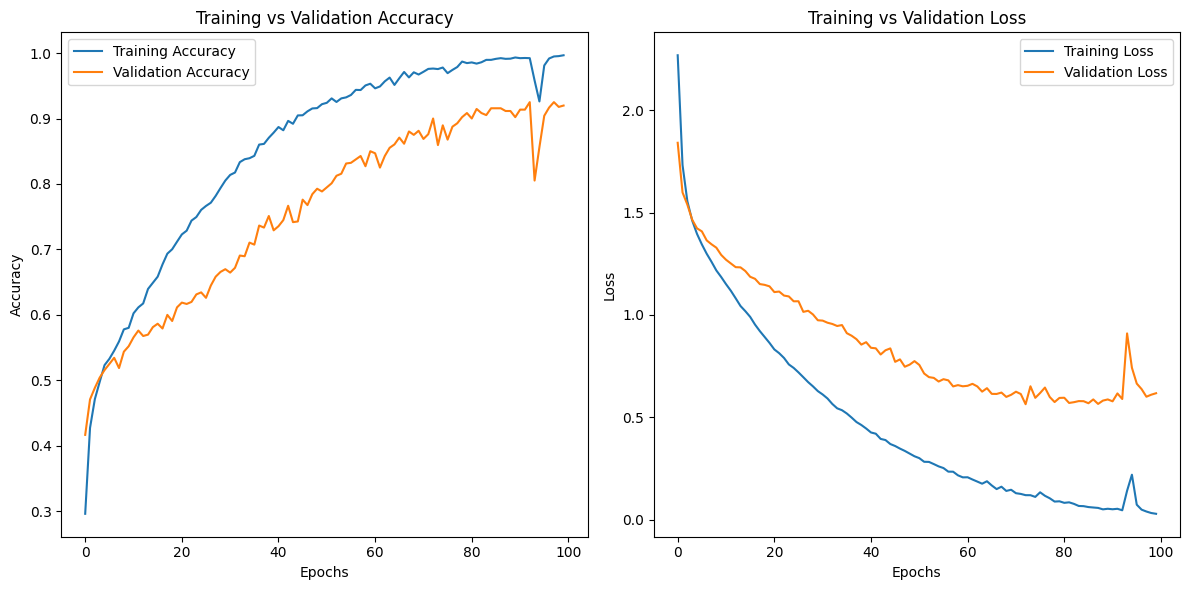

In [13]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)  # Subplot untuk accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

##TESTING

In [ ]:
def predict_career_with_probabilities(input_data):
    # Tambahkan average_score
    input_data['average_score'] = input_data[
        ['math_score', 'history_score', 'physics_score',
         'chemistry_score', 'biology_score', 'english_score', 'geography_score']
    ].mean(axis=1)

    # Pastikan semua kolom yang diperlukan ada dalam data
    if 'part_time_job' not in input_data.columns:
        input_data['part_time_job'] = False  # Default value
    if 'extracurricular_activities' not in input_data.columns:
        input_data['extracurricular_activities'] = False  # Default value

    # Transform gender (Label Encoding)
    input_data['gender'] = label_encoders['gender'].transform(input_data['gender'])

    # Standarisasi fitur numerik
    input_data[numerical_columns] = scaler.transform(input_data[numerical_columns])

    # Pastikan urutan kolom sesuai dengan X_train
    input_data = input_data[X_train.columns]

    # Prediksi probabilitas dengan model
    probabilities = nn_model.predict(input_data)[0]

    # Ambil nama-nama kelas dari encoder
    class_labels = label_encoders['career_aspiration'].classes_

    # Gabungkan hasil dengan nama kelas
    prediction_result = {class_labels[i]: probabilities[i] * 100 for i in range(len(class_labels))}

    return prediction_result

# Contoh Penggunaan
new_user_data = pd.DataFrame({
    'gender': ['female'],
    'absence_days': [5],
    'weekly_self_study_hours': [20],
    'math_score': [92],
    'history_score': [80],
    'physics_score': [85],
    'chemistry_score': [90],
    'biology_score': [88],
    'english_score': [87],
    'geography_score': [82],
    'part_time_job': [False],
    'extracurricular_activities': [True]
})

predicted_probabilities = predict_career_with_probabilities(new_user_data)
print("Predicted Probabilities:", predicted_probabilities)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted Probabilities: {'Accountant': 0.1433177851140499, 'Artist': 2.1083572363542532e-16, 'Banker': 0.49093645066022873, 'Business Owner': 1.08433762331081e-16, 'Construction Engineer': 1.8511487454020426e-06, 'Designer': 6.113605763857777e-05, 'Doctor': 0.3886351827532053, 'Game Developer': 8.701023977925396e-13, 'Government Officer': 0.0001221128627548751, 'Lawyer': 1.9758583391649154e-05, 'Real Estate Developer': 1.3969672640889996e-08, 'Scientist': 0.0007040110176603775, 'Social Network Studies': 0.002396210220467765, 'Software Engineer': 98.90323281288147, 'Stock Investor': 0.07044301019050181, 'Teacher': 9.482438372288016e-05, 'Writer': 3.029445565516653e-05}


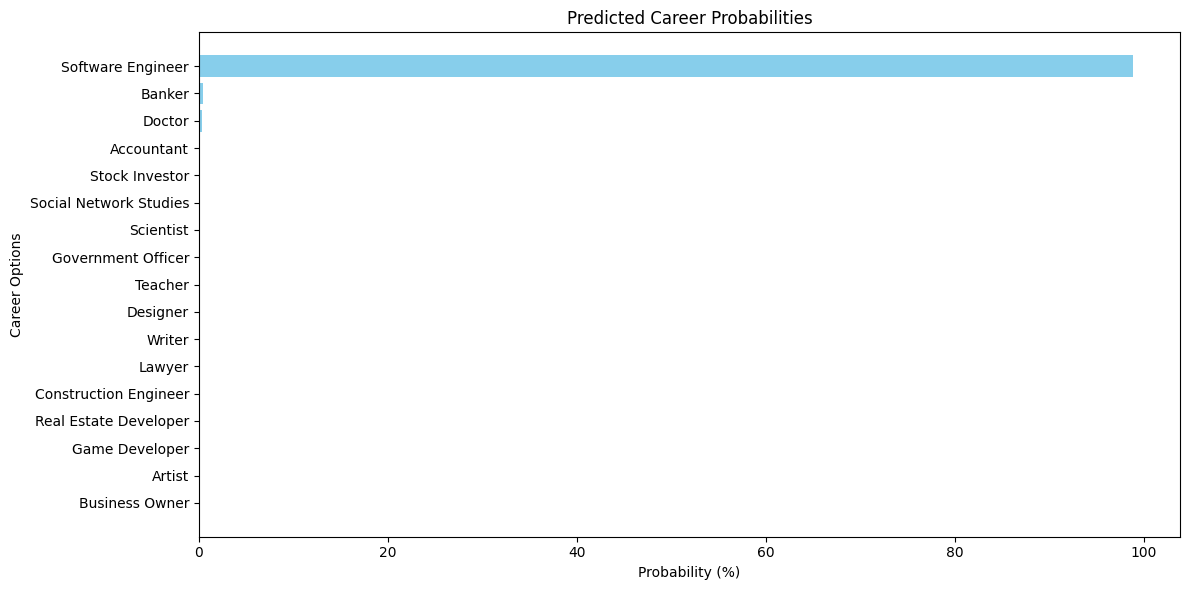

In [ ]:
# Convert data into a pandas DataFrame for easier handling
df = pd.DataFrame(list(predicted_probabilities.items()), columns=["Career", "Probability"])
df = df.sort_values(by="Probability", ascending=False)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.barh(df["Career"], df["Probability"], color="skyblue")
plt.xlabel("Probability (%)")
plt.ylabel("Career Options")
plt.title("Predicted Career Probabilities")
plt.gca().invert_yaxis()  # To have the highest probabilities on top
plt.tight_layout()
plt.show()


## Save Model

In [14]:
# pip install tensorflowjs

In [15]:
import tensorflowjs as tfjs

# Direktori untuk menyimpan model
output_dir = "tfjs_model"

# Simpan model dalam format TensorFlow.js
tfjs.converters.save_keras_model(nn_model, output_dir)

print(f"Model disimpan di: {output_dir}")


failed to lookup keras version from the file,
    this is likely a weight only file
Model disimpan di: tfjs_model


In [18]:
nn_model.save('career_model.h5')


In [20]:
import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

model = load_model('career_model.h5')
tfjs.converters.save_keras_model(model, './models/career_models/')


failed to lookup keras version from the file,
    this is likely a weight only file
